Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [120]:
import logging
from itertools import combinations
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import networkx as nx
from matplotlib import pyplot as plt
from icecream import ic
from itertools import accumulate
from random import random


In [633]:
CITIES = pd.read_csv('cities/italy.csv', header=None, names=['name', 'lat', 'lon'])
DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)))
for c1, c2 in combinations(CITIES.itertuples(), 2):
    DIST_MATRIX[c1.Index, c2.Index] = DIST_MATRIX[c2.Index, c1.Index] = geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km
CITIES.head()

,name,lat,lon
0,Abilene,32.454514,-99.738147
1,Akron,41.080456,-81.521429
2,Albuquerque,35.105552,-106.647388
3,Alexandria,38.818343,-77.082026
4,Allen,33.107224,-96.674676


## Lab2 - TSP

https://www.wolframcloud.com/obj/giovanni.squillero/Published/Lab2-tsp.nb

In [115]:
def tsp_cost(tsp):
    tot_cost = 0
    for c1, c2 in zip(tsp, tsp[1:]):
        tot_cost += DIST_MATRIX[c1, c2]
    return tot_cost

## First Greedy Algorithm

In [632]:
def closerOneAlgorithm(print):
    visited = np.full(len(CITIES), False)
    dist = DIST_MATRIX.copy()
    city = 0
    visited[city] = True
    tsp = list()
    tsp.append(int(city))
    while not np.all(visited):
        dist[:, city] = np.inf
        closest = np.argmin(dist[city])
        if (print==True):
            logging.debug(
                f"  {CITIES.at[city,'name']} -> {CITIES.at[closest,'name']} ({DIST_MATRIX[city,closest]:.2f}km)"
            )
        visited[closest] = True
        city = closest
        tsp.append(int(city))
    if (print==True):
        logging.debug(
            f"  {CITIES.at[tsp[-1],'name']} -> {CITIES.at[tsp[0],'name']} ({DIST_MATRIX[tsp[-1],tsp[0]]:.2f}km)"
        )
    tsp.append(tsp[0])
    if (print==True):
        logging.info(f"  Found a path of {len(tsp)-1} steps, total length {tsp_cost(tsp):.2f}km")
    else:
        ic('Closer City Algorithm: ', tsp_cost(tsp))
    return tsp

closerOneAlgorithm(True)
ic()

DEBUG:root:  Abakan -> Krasnoyarsk (276.58km)
DEBUG:root:  Krasnoyarsk -> Achinsk (161.71km)
DEBUG:root:  Achinsk -> Kemerovo (296.59km)
DEBUG:root:  Kemerovo -> Leninsk‐Kuznetskiy (74.76km)
DEBUG:root:  Leninsk‐Kuznetskiy -> Prokopyevsk (91.87km)
DEBUG:root:  Prokopyevsk -> Novokuznetsk (30.63km)
DEBUG:root:  Novokuznetsk -> Biysk (187.38km)
DEBUG:root:  Biysk -> Barnaul (132.82km)
DEBUG:root:  Barnaul -> Novosibirsk (194.50km)
DEBUG:root:  Novosibirsk -> Tomsk (206.90km)
DEBUG:root:  Tomsk -> Seversk (14.97km)
DEBUG:root:  Seversk -> Rubtsovsk (613.13km)
DEBUG:root:  Rubtsovsk -> Omsk (647.47km)
DEBUG:root:  Omsk -> Tobolsk (475.40km)
DEBUG:root:  Tobolsk -> Tyumen (200.98km)
DEBUG:root:  Tyumen -> Kurgan (189.69km)
DEBUG:root:  Kurgan -> Kopeysk (236.87km)
DEBUG:root:  Kopeysk -> Chelyabinsk (14.72km)
DEBUG:root:  Chelyabinsk -> Miass (87.20km)
DEBUG:root:  Miass -> Zlatoust (33.88km)
DEBUG:root:  Zlatoust -> Pervouralsk (194.64km)
DEBUG:root:  Pervouralsk -> Yekaterinburg (40.19km)

## Second Greedy Algorithm

In [117]:
def has_cycle(tsp):
    G = nx.Graph()
    G.add_edges_from(tsp)
    try:
        nx.find_cycle(G)
        return True
    except:
        return False

In [631]:
def minimumSegmentAlgorithm(print):  
    segments = [
        ((c1, c2), float(DIST_MATRIX[c1, c2])) for c1, c2 in combinations(range(len(CITIES)), 2)
    ]
    taken_segments = list()
    taken_cities = np.full(len(CITIES), 0)
    sorted_segments = [_ for _ in sorted(segments, key=lambda e: e[1])]

    while (sorted_segments):
        shortest = sorted_segments.pop(0)
        first = shortest[0][0]
        second = shortest[0][1]
        if (taken_cities[first]<2 and taken_cities[second]<2):
            taken_segments.append(shortest[0])
            if (has_cycle(taken_segments)):
                if (len(taken_segments)<=len(CITIES)-1):
                    taken_segments.pop()
            else:
                taken_cities[first] += 1
                taken_cities[second] += 1
    tsp = list()
    tsp.append(0)
    previous = 0
    while (len(tsp)<len(CITIES)+1):
        for i in range(len(taken_segments)):
            if (taken_segments[i][0]==previous or taken_segments[i][1]==previous):
                next = taken_segments.pop(i)
                if (next[0]==previous):
                    current=next[1]
                elif (next[1]==previous):
                    current=next[0]
                tsp.append(current)
                if (print==True):
                    logging.debug(
                        f"step: {CITIES.at[previous,'name']} -> {CITIES.at[current,'name']} ({DIST_MATRIX[previous,current]:.2f}km)"
                    )
                previous = current
                break
    if (print==True):
        logging.info(f"  Found a path of {len(tsp)-1} steps, total length {tsp_cost(tsp):.2f}km")
    else:
        ic('Minimum Distance Segments: ', tsp_cost(tsp))
    return tsp

minimumSegmentAlgorithm(True)
ic()

DEBUG:root:step: Abakan -> Krasnoyarsk (276.58km)
DEBUG:root:step: Krasnoyarsk -> Achinsk (161.71km)
DEBUG:root:step: Achinsk -> Seversk (351.51km)
DEBUG:root:step: Seversk -> Tomsk (14.97km)
DEBUG:root:step: Tomsk -> Kemerovo (147.60km)
DEBUG:root:step: Kemerovo -> Leninsk‐Kuznetskiy (74.76km)
DEBUG:root:step: Leninsk‐Kuznetskiy -> Prokopyevsk (91.87km)
DEBUG:root:step: Prokopyevsk -> Novokuznetsk (30.63km)
DEBUG:root:step: Novokuznetsk -> Biysk (187.38km)
DEBUG:root:step: Biysk -> Barnaul (132.82km)
DEBUG:root:step: Barnaul -> Novosibirsk (194.50km)
DEBUG:root:step: Novosibirsk -> Rubtsovsk (407.28km)
DEBUG:root:step: Rubtsovsk -> Omsk (647.47km)
DEBUG:root:step: Omsk -> Kurgan (515.68km)
DEBUG:root:step: Kurgan -> Tyumen (189.69km)
DEBUG:root:step: Tyumen -> Tobolsk (200.98km)
DEBUG:root:step: Tobolsk -> Nefteyugansk (406.49km)
DEBUG:root:step: Nefteyugansk -> Surgut (43.14km)
DEBUG:root:step: Surgut -> Nizhnevartovsk (173.64km)
DEBUG:root:step: Nizhnevartovsk -> Noyabrsk (254.53km)

## Simulated Annealing

In [627]:
def fitness(solution):
    return -tsp_cost(solution)

def tweak(solution, probability):
    new_solution = solution.copy()
    new_solution.pop()
    first = np.random.randint(0, len(CITIES))
    second = first+probability
    while (second>=len(CITIES)):
        first = np.random.randint(0, len(CITIES))
        second = first+probability
    index = first
    temp = list()
    while (index<=second):
        temp.append(new_solution[index])
        index += 1
    index = second
    while (index>=first):
        new_solution[index] = temp.pop(0)
        index -= 1
    new_solution.append(new_solution[0])
    return new_solution

INFO:root:  Found a path of 326 steps, total length 48050.03km
INFO:root:  Found a path of 326 steps, total length 45845.92km
ic| best_fitness: np.float64(-40265.58506956834)


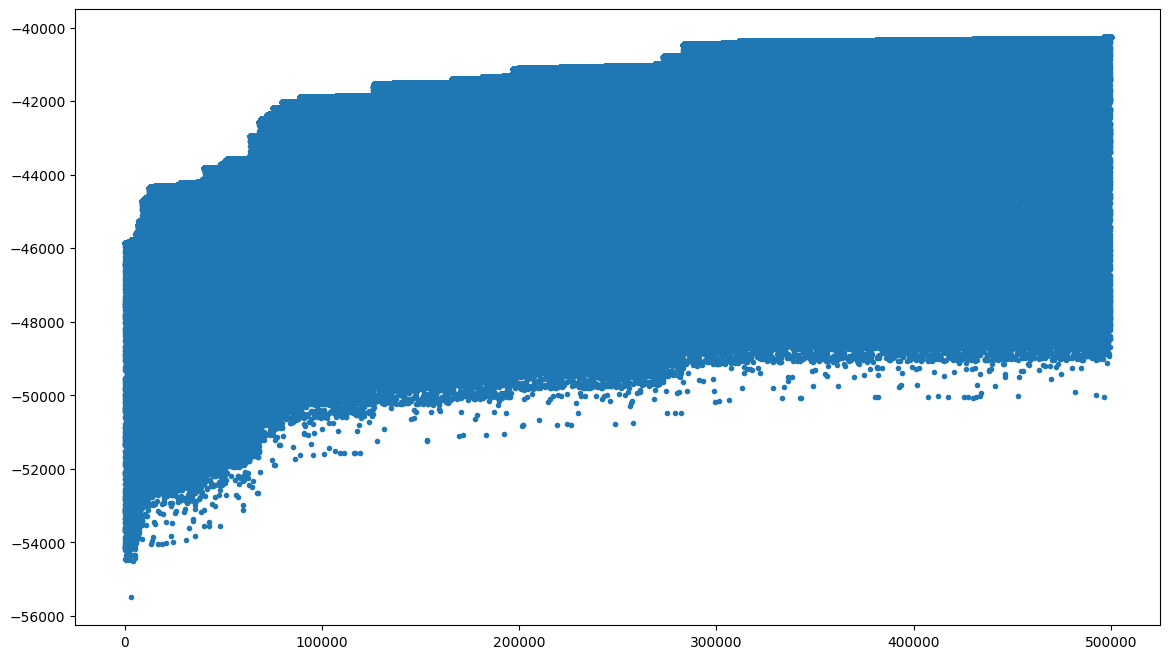

In [635]:
initial_solution = list()
first_solution = closerOneAlgorithm(False)
second_solution = minimumSegmentAlgorithm(False)
#if (tsp_cost(first_solution)<tsp_cost(second_solution)):
    #initial_solution = first_solution
#else:
initial_solution = second_solution
best_solution = initial_solution.copy()
best_fitness = fitness(best_solution)
current_solution = best_solution.copy()
current_solution_fitness = best_fitness
history = [best_fitness]

for restart in range(200):
        probability = round(len(CITIES)*0.6)

        for step in range(100):

            new_solution = tweak(current_solution, probability)
            f = fitness(new_solution)
            history.append(f)

            if f > current_solution_fitness:
                current_solution = new_solution.copy()
                current_solution_fitness = f
                
            probability -= 1

        if current_solution_fitness > best_fitness:
            best_fitness = current_solution_fitness
            best_solution = current_solution.copy()

ic(best_fitness)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max))
)
_ = plt.scatter(range(len(history)), history, marker=".")
